In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from node2vec import Node2Vec
import pandas as pd

In [2]:
graph = nx.Graph()

with open ("../Data/yeast/BioGRID.txt", "r") as inputFile:
    graph.add_edges_from([line.strip().split("\t") for line in inputFile])

In [3]:
print("Broj cvorova:", len(graph.nodes()))
print("Broj grana:", len(graph.edges()))

Broj cvorova: 5640
Broj grana: 59748


In [4]:
print("Broj komponenti povezanosti:", len(list(nx.connected_components(graph))))

Broj komponenti povezanosti: 1


In [5]:
with open ("../Data/yeast/disprotYeast194.txt", "r") as inputFile:
    disProt = [line.strip() for line in inputFile]

In [6]:
#disProt

In [7]:
print("Broj cvorova nakon brisanja:", len(graph.nodes()))
print("Broj grana nakon brisanja:", len(graph.edges()))

Broj cvorova nakon brisanja: 5640
Broj grana nakon brisanja: 59748


In [8]:
nDisProt = 0
for node in graph.nodes():
    if(node in disProt):
        nDisProt += 1
        
print("Broj IDP u podgrafu:", nDisProt)

Broj IDP u podgrafu: 194


In [9]:
'''
node2vec = Node2Vec(graph)

model = node2vec.fit()

embeddings = {node: model.wv[str(node)] for node in graph.nodes()}
''';

In [10]:
'''
columns = [f"column{i}" for i in range(1, node2vec.dimensions + 1)]
columns.insert(0, "node")
columns.insert(0, "label")
''';

In [11]:
def assignLabel(node, IDPs):
    if node in IDPs:
        return 1
    return 0

In [12]:
'''
pandasData = []

for node in embeddings:
    nodeEmbeding = []
    nodeEmbeding.append(node)
    nodeEmbeding.insert(0, assignLabel(node, disProt))
    nodeEmbeding += list(embeddings[node])
    pandasData.append(nodeEmbeding)
    
len(pandasData[0])
''';

In [13]:
'''
dataFrame = pd.DataFrame(pandasData, columns=columns)
dataFrame
''';

In [14]:
#dataFrame.to_csv("../Data/Embedings/test_embeding_01.csv")

In [15]:
degreeCentrality = nx.degree_centrality(graph)

In [16]:
#closenessCentrality = nx.closeness_centrality(graph)

In [17]:
closenessCentrality = {}

with open ("../Data/Centrality/closeness_centrality.txt", "r") as inputFile:
    for line in inputFile:
        fromNode, toNode = line.split("\t")
        closenessCentrality[fromNode] = float(toNode)

In [18]:
#with open("../Data/Centrality/closeness_centrality.txt", "w") as outputFile:
    #for node in closenessCentrality:
        #outputFile.write(f"{node}\t{closenessCentrality[node]}\n")

In [19]:
closenessCentrality

{'YDR143C': 0.45254133496631965,
 'YER068W': 0.3916862270008329,
 'YMR207C': 0.4294371575626764,
 'YNR016C': 0.43898506449422947,
 'YIL135C': 0.38270326255826,
 'YMR139W': 0.4190699935191186,
 'YNL316C': 0.4207059206245934,
 'YOL082W': 0.43861285399355604,
 'YHR211W': 0.3837252429345004,
 'YNL255C': 0.5385175931709348,
 'YJL125C': 0.3307121851425649,
 'YNL062C': 0.31736196319018406,
 'YDL014W': 0.4314068884997081,
 'YKL125W': 0.39130105900151285,
 'YJL218W': 0.35224022878932315,
 'YLR291C': 0.4020049735778676,
 'YLR448W': 0.4501784004873379,
 'YNL096C': 0.44495097195940136,
 'YLR075W': 0.4167069437731593,
 'YNL110C': 0.4392086941755816,
 'YHR135C': 0.4854086515905039,
 'YNL199C': 0.41450320512820515,
 'YJL092W': 0.4482668977469671,
 'YOR281C': 0.40426695842450766,
 'YGL173C': 0.46544898326435125,
 'YKL139W': 0.4200568412505075,
 'YER125W': 0.46138066357474133,
 'YPL115C': 0.37127682480442115,
 'YPL161C': 0.33486535473847745,
 'YEL002C': 0.37141010913268235,
 'YKL008C': 0.37726079346557

In [20]:
#betweennessCentrality = nx.betweenness_centrality(graph)

In [21]:
#with open("../Data/Centrality/betweenness_centrality.txt", "w") as outputFile:
    #for node in betweennessCentrality:
        #outputFile.write(f"{node}\t{betweennessCentrality[node]}\n")

In [22]:
betweennessCentrality = {}

with open ("../Data/Centrality/betweenness_centrality.txt", "r") as inputFile:
    for line in inputFile:
        fromNode, toNode = line.split("\t")
        betweennessCentrality[fromNode] = float(toNode)

In [23]:
dataFrame = pd.read_csv("../Data/Embedings/test_embeding_01.csv")
dataFrame

,id,label,node,column1,column2,column3,column4,column5,column6,column7,...,column119,column120,column121,column122,column123,column124,column125,column126,column127,column128
0,0,1,YDR143C,0.181880,-0.121357,0.289465,0.315835,0.189465,-0.155386,-0.032098,...,0.477857,-0.517378,-0.153525,-0.425507,0.238238,0.609218,-0.101967,-0.166134,-0.018215,0.080644
1,1,0,YER068W,0.238670,-0.095388,0.506771,0.480241,0.137246,-0.308545,0.273882,...,0.361147,-0.022120,-0.163415,-0.291486,-0.445383,0.011535,-0.216152,-0.333152,-0.338296,-0.138975
2,2,0,YMR207C,0.138863,0.214626,-0.323426,0.317080,0.342831,-0.244966,0.257627,...,-0.143747,-0.149558,0.112232,-0.456917,-0.267802,0.146867,-0.059080,-0.078735,-0.000369,0.102875
3,3,1,YNR016C,0.310560,0.238762,-0.133574,0.358011,0.570151,0.137159,0.372698,...,-0.200761,0.217550,-0.144091,-0.704132,-0.073946,0.678215,-0.369062,0.186573,-0.125400,0.072606
4,4,0,YIL135C,-0.093454,-0.150126,-0.129806,-0.186680,0.500056,-0.315904,0.022274,...,0.107580,-0.086289,-0.413255,-0.171848,-0.069605,-0.024614,0.067461,-0.415500,-0.479209,0.130411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,5169,0,YDR003W-A,0.114759,0.196542,0.004920,0.268832,0.153753,-0.100780,-0.158085,...,0.037773,0.002154,-0.203849,-0.061836,0.042036,-0.017939,0.075863,-0.175965,0.391306,-0.100020
5170,5170,0,YDR042C,0.082494,0.071945,0.206510,0.055254,0.398462,-0.518748,-0.002814,...,0.285635,0.015909,-0.437818,-0.242805,0.004020,0.613556,-0.025771,-0.441112,-0.381888,-0.117774
5171,5171,0,YGL057C,-0.333317,-0.075193,0.064555,0.521543,0.115727,-0.241973,0.211871,...,0.268566,-0.343860,-0.188258,0.400391,0.236366,-0.133264,0.083364,-0.328083,-0.200130,-0.401794
5172,5172,0,YHR202W,0.140493,0.264381,0.203311,0.340720,0.351510,0.419692,-0.559271,...,0.445130,-0.205948,-0.027929,0.199347,0.416053,0.426254,0.369247,-0.205847,-0.832293,0.564035


In [24]:
degreeCentralityList = []
closenessCentralityList = []
betweennessCentralityList = []
for node in dataFrame["node"]:
    degreeCentralityList.append(degreeCentrality[node])
    closenessCentralityList.append(closenessCentrality[node])
    betweennessCentralityList.append(betweennessCentrality[node])

In [25]:
#dataFrame["degree_centrality"] = degreeCentralityList
#dataFrame["closeness_centrality"] = closenessCentralityList
#dataFrame["betweenness_centrality"] = betweennessCentralityList
#dataFrame

In [26]:
x = dataFrame[dataFrame.columns[3::]]
x

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column119,column120,column121,column122,column123,column124,column125,column126,column127,column128
0,0.181880,-0.121357,0.289465,0.315835,0.189465,-0.155386,-0.032098,-0.157449,-0.306582,0.010105,...,0.477857,-0.517378,-0.153525,-0.425507,0.238238,0.609218,-0.101967,-0.166134,-0.018215,0.080644
1,0.238670,-0.095388,0.506771,0.480241,0.137246,-0.308545,0.273882,-0.363655,0.044217,0.184922,...,0.361147,-0.022120,-0.163415,-0.291486,-0.445383,0.011535,-0.216152,-0.333152,-0.338296,-0.138975
2,0.138863,0.214626,-0.323426,0.317080,0.342831,-0.244966,0.257627,0.608573,-0.145816,-0.165538,...,-0.143747,-0.149558,0.112232,-0.456917,-0.267802,0.146867,-0.059080,-0.078735,-0.000369,0.102875
3,0.310560,0.238762,-0.133574,0.358011,0.570151,0.137159,0.372698,0.582193,-0.187882,-0.262372,...,-0.200761,0.217550,-0.144091,-0.704132,-0.073946,0.678215,-0.369062,0.186573,-0.125400,0.072606
4,-0.093454,-0.150126,-0.129806,-0.186680,0.500056,-0.315904,0.022274,-0.290944,0.031417,0.116932,...,0.107580,-0.086289,-0.413255,-0.171848,-0.069605,-0.024614,0.067461,-0.415500,-0.479209,0.130411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,0.114759,0.196542,0.004920,0.268832,0.153753,-0.100780,-0.158085,-0.092890,-0.324511,0.213283,...,0.037773,0.002154,-0.203849,-0.061836,0.042036,-0.017939,0.075863,-0.175965,0.391306,-0.100020
5170,0.082494,0.071945,0.206510,0.055254,0.398462,-0.518748,-0.002814,-0.013137,0.262286,-0.019382,...,0.285635,0.015909,-0.437818,-0.242805,0.004020,0.613556,-0.025771,-0.441112,-0.381888,-0.117774
5171,-0.333317,-0.075193,0.064555,0.521543,0.115727,-0.241973,0.211871,-0.070246,-0.353172,0.288697,...,0.268566,-0.343860,-0.188258,0.400391,0.236366,-0.133264,0.083364,-0.328083,-0.200130,-0.401794
5172,0.140493,0.264381,0.203311,0.340720,0.351510,0.419692,-0.559271,0.015894,0.190691,-0.316085,...,0.445130,-0.205948,-0.027929,0.199347,0.416053,0.426254,0.369247,-0.205847,-0.832293,0.564035


In [27]:
y = dataFrame["label"]
#y

In [28]:
import imblearn as im
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.decomposition import PCA
import numpy as np

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print("Confusion matrix for model {} on {} data ".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print("---------------------------------------------------------------------------------")

def resample(sampler, x, y):
    x_resampled, y_resampled = sampler.fit_resample(x, y)
    print("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y).items()))
    print("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()))
    return x_resampled, y_resampled

def visualize(x, x_resampled, y, y_resampled, x_opacity=0.5):
    
    pca = PCA(n_components=2)
    pca.fit(x)
    
    x_pca = pca.transform(x)
    x_resampled_pca = pca.transform(x_resampled) 
    
    x_stacked = [x_pca, x_resampled_pca]
    y_stacked = [y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == 0 else 'r' for y in y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in y_stacked[i]]
        plt.scatter(x_stacked[i][:, 0], x_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()
    
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    report_imbalanced(model, x_train, y_train, "training")
    report_imbalanced(model, x_test, y_test, "test")
    return model

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [30]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


In [31]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 0.5, k_neighbors=5)
x_resampled, y_resampled = resample(smote, x_train, y_train)
visualize(x_train, x_resampled, y_train, y_resampled, 0)
''';

Number of instances before resampling with SMOTEENN : dict_items([(0, 3486), (1, 135)]). 
Number of instances after  resampling with SMOTEENN : dict_items([(0, 2294), (1, 1394)]). 


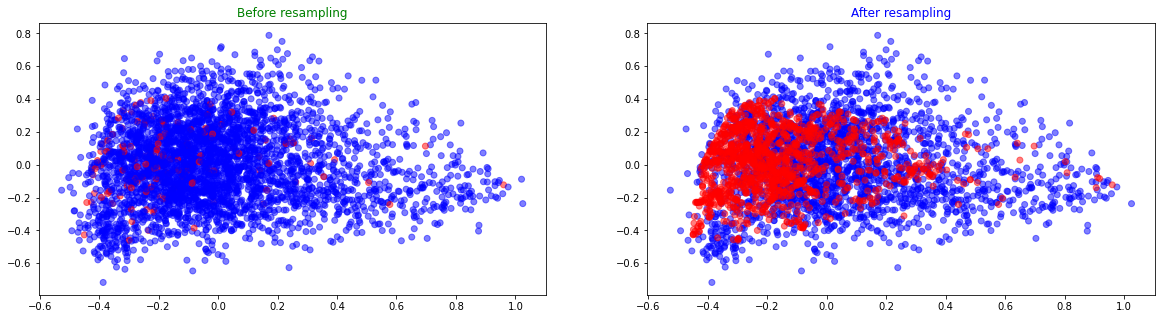

In [32]:

from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(sampling_strategy= 0.4)
x_resampled, y_resampled = resample(smoteenn, x_train, y_train)
visualize(x_train, x_resampled, y_train, y_resampled, 0.5)


In [33]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_resampled)
x_resampled = pd.DataFrame(scaler.transform(x_resampled), columns=x_resampled.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
''';

In [34]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(5, 20, 2),
          'weights': ['uniform', 'distance'],
          'p': [1, 2]
         }

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#model = GradientBoostingClassifier()
#model = GaussianNB()
#model = DecisionTreeClassifier()
#model = KNeighborsClassifier(n_neighbors=5)
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring= "f1")
estimator.fit(x_resampled, y_resampled)
model = estimator.best_estimator_
#model.fit(x_resampled, y_resampled)
#model.fit(x_train, y_train)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(x_resampled)
print("Recall   :", recall_score(y_resampled, y_train_pred))
print("Precision:", precision_score(y_resampled, y_train_pred))
print("F1       :", f1_score(y_resampled, y_train_pred))

Recall   : 1.0
Precision: 0.9495912806539509
F1       : 0.9741439552760307


In [37]:
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(x_train)
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1       :", f1_score(y_train, y_train_pred))
''';

In [38]:
y_test_pred = model.predict(x_test)
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1       :", f1_score(y_test, y_test_pred))

Recall   : 0.6379310344827587
Precision: 0.06324786324786325
F1       : 0.11508553654743389


In [39]:
matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
matrix

,0,1
0,947,548
1,21,37


In [40]:
accuracy_score(y_test, y_test_pred)

0.6336123631680618

In [41]:
estimator.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [42]:
estimator.best_score_

0.9047597549289621

In [43]:
matrix1 = pd.DataFrame(confusion_matrix(y_resampled, y_train_pred))
matrix1

,0,1
0,2220,74
1,0,1394
